In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
from matplotlib import font_manager, rc
import matplotlib
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font_name)

# 데이터 확인

In [3]:
pich = pd.read_csv("./data/picher_stats_2017.csv")
batt = pd.read_csv("./data/batter_stats_2017.csv")

In [4]:
pich.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,8.95,2.13,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,7.43,1.85,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,7.36,2.09,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,8.04,1.95,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,7.49,2.11,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


In [5]:
pich.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   선수명       152 non-null    object 
 1   팀명        152 non-null    object 
 2   승         152 non-null    int64  
 3   패         152 non-null    int64  
 4   세         152 non-null    int64  
 5   홀드        152 non-null    int64  
 6   블론        152 non-null    int64  
 7   경기        152 non-null    int64  
 8   선발        152 non-null    int64  
 9   이닝        152 non-null    float64
 10  삼진/9      152 non-null    float64
 11  볼넷/9      152 non-null    float64
 12  홈런/9      152 non-null    float64
 13  BABIP     152 non-null    float64
 14  LOB%      152 non-null    float64
 15  ERA       152 non-null    float64
 16  RA9-WAR   152 non-null    float64
 17  FIP       152 non-null    float64
 18  kFIP      152 non-null    float64
 19  WAR       152 non-null    float64
 20  연봉(2018)  152 non-null    int64 

In [6]:
batt.head()

,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,삼진,도루,BABIP,타율,출루율,장타율,OPS,wOBA,WAR,연봉(2018),연봉(2017)
0,최정,SK,130,527,430,136,46,89,113,70,107,1,0.316,0.316,0.427,0.684,1.111,0.442,7.30,120000,120000
1,최형우,KIA,142,629,514,176,26,98,120,96,82,0,0.362,0.342,0.450,0.576,1.026,0.430,7.20,150000,150000
2,박건우,두산,131,543,483,177,20,91,78,41,64,20,0.39,0.366,0.424,0.582,1.006,0.424,7.04,37000,19500
3,나성범,NC,125,561,498,173,24,103,99,48,116,17,0.413,0.347,0.415,0.584,0.999,0.416,5.64,43000,35000
4,손아섭,롯데,144,667,576,193,20,113,80,83,96,25,0.374,0.335,0.420,0.514,0.934,0.398,5.60,150000,65000


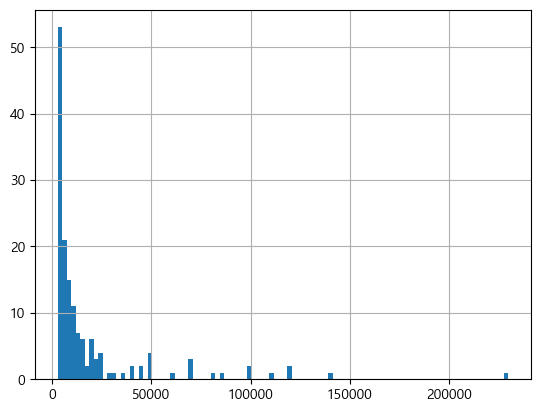

In [7]:
# 2018년 투수 연봉 분포 히스토그램
pich["연봉(2018)"].hist(bins = 100)
plt.show()

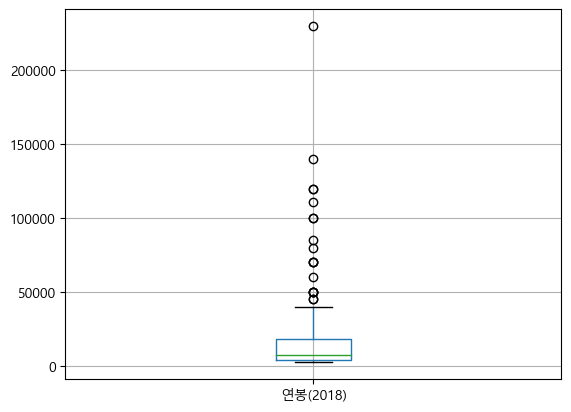

In [9]:
# 2018년 연봉의 상자 그림 출력
pich.boxplot(column = ["연봉(2018)"])
plt.show()

- 종속변수 분석
    - 수십억의 연봉을 받는 프로 야구선수는 많지 않으며, 5억원 미만의 연봉이 일반적임

In [10]:
# 선수명, 팀명과 같이 그래프로 표현할 수 없는 피처 제외하고 시각화
vis_pich = pich.iloc[:, 2:]
vis_pich.head()

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,16,7,0,0,0,30,30,190.0,8.95,2.13,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,11,11,1,0,0,30,29,185.1,7.43,1.85,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,20,6,0,0,0,31,31,193.1,7.36,2.09,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,10,7,0,0,0,28,28,175.2,8.04,1.95,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,13,7,0,0,0,30,30,187.1,7.49,2.11,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


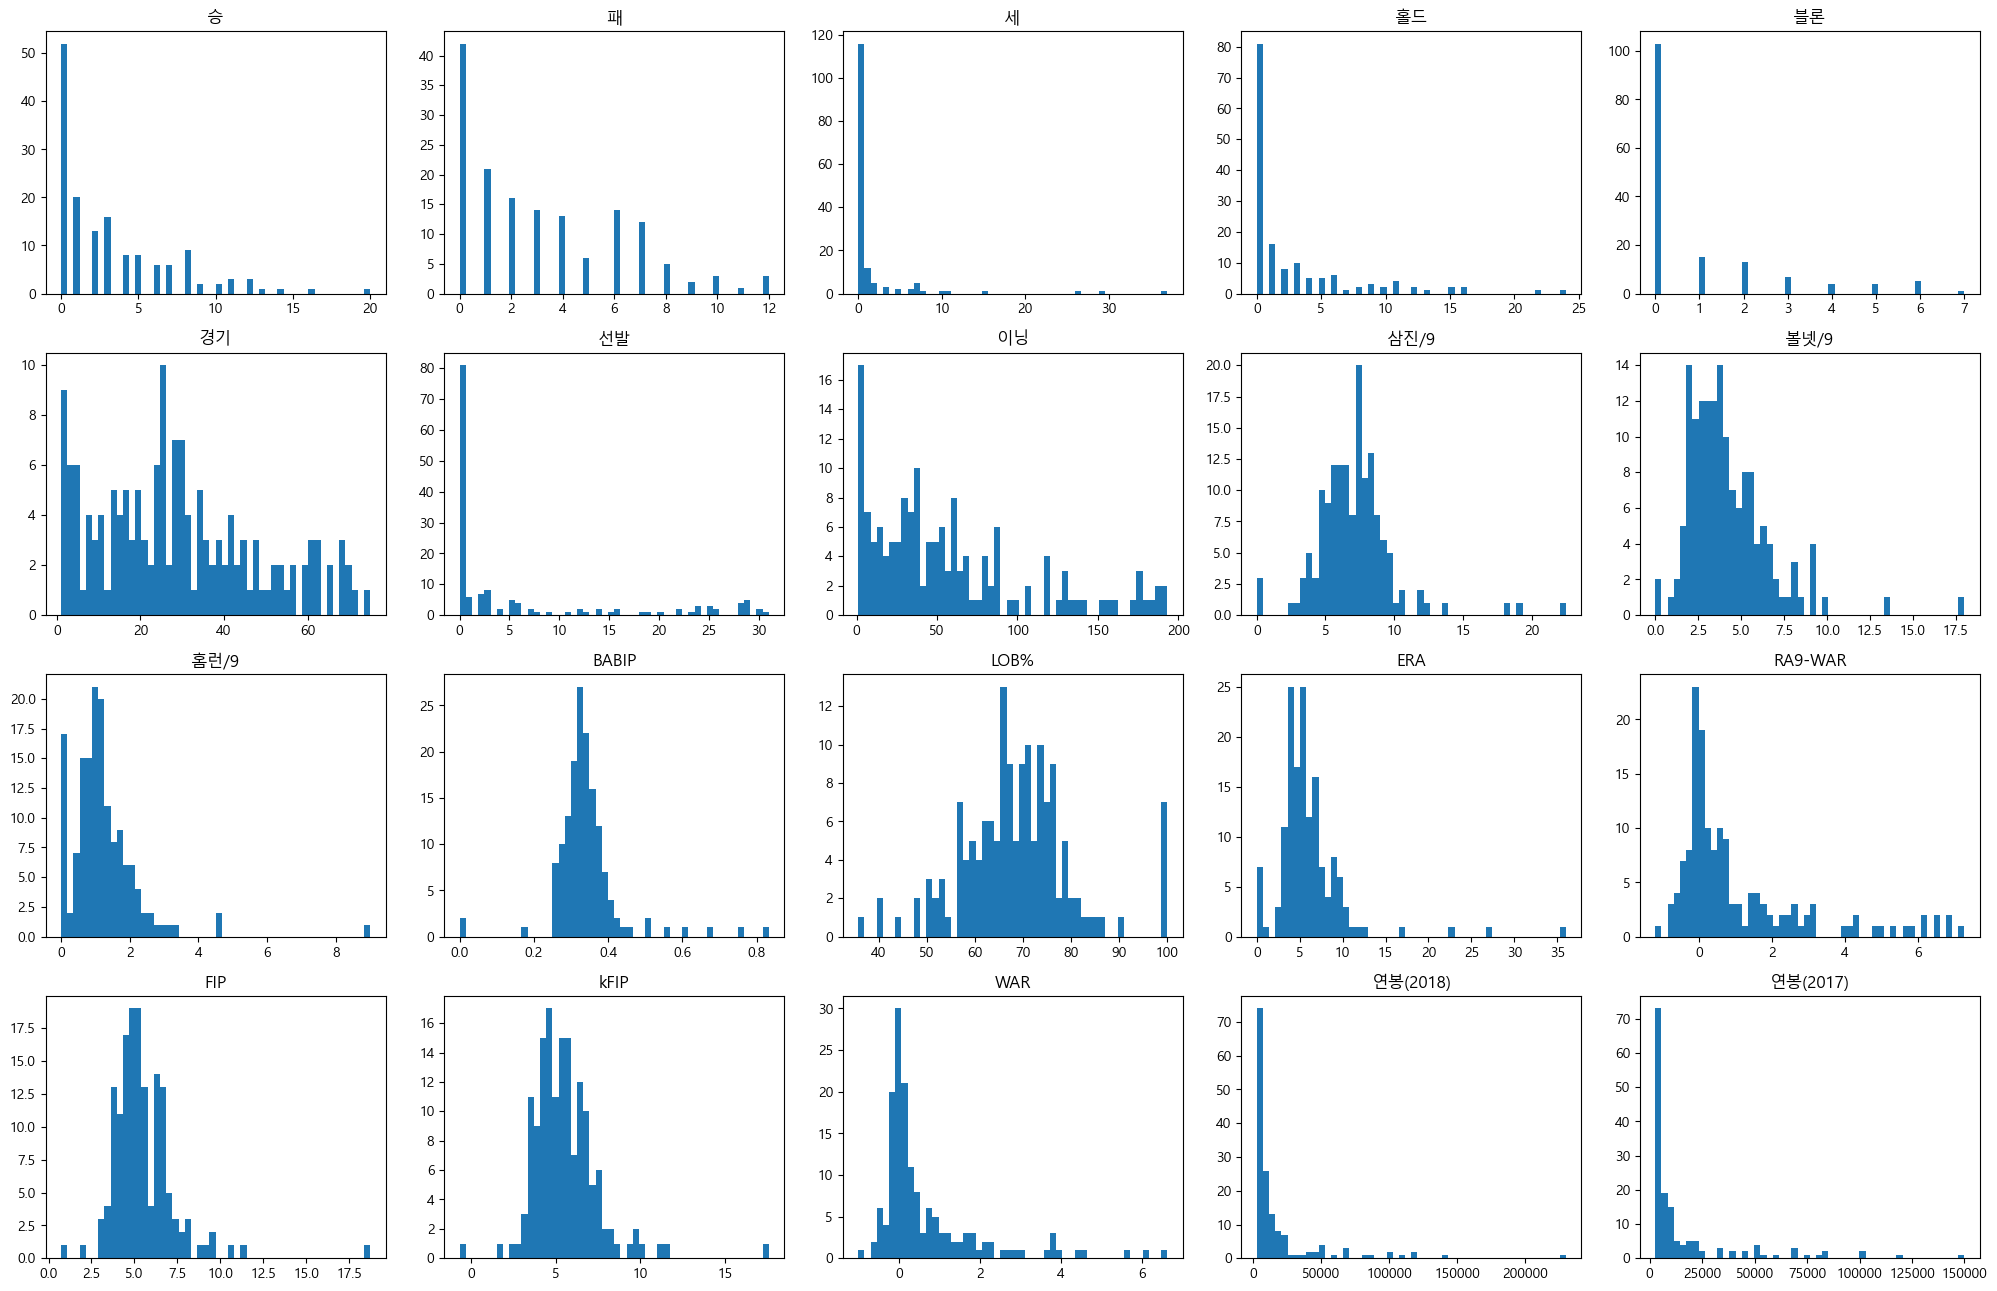

In [11]:
# 피처 각각에 대한 히스토그램을 출력
fig = plt.figure(figsize = (20, 16))

# df의 열 개수 만큼의 subplot을 출력
for i in range(len(vis_pich.columns)):
    ax = fig.add_subplot(5, 5, i + 1)
    plt.hist(vis_pich[vis_pich.columns[i]], bins = 50)
    ax.set_title(vis_pich.columns[i])
    
plt.tight_layout()   # 자동을로 여백 조정
plt.show()

- 매우 불균형한 분포를 가지고 있는 피처들이 많음
- 각 피처 간의 단위가 많이 다름
    - 스케일링이 필요함
        - 선형회귀도 단위가 큰 데이터의 영향을 크게 받을 수 있음

# 데이터 전처리

## 스케일링

In [12]:
# 판다스에서 scientific-notation이 아닌 float 모양으로 출력되게 설정
pd.options.mode.chained_assignment = None

In [13]:
scale_col = pich.columns[2:].tolist()

In [15]:
scale_col.remove("연봉(2018)")

In [16]:
scale_col

['승',
 '패',
 '세',
 '홀드',
 '블론',
 '경기',
 '선발',
 '이닝',
 '삼진/9',
 '볼넷/9',
 '홈런/9',
 'BABIP',
 'LOB%',
 'ERA',
 'RA9-WAR',
 'FIP',
 'kFIP',
 'WAR',
 '연봉(2017)']

In [17]:
pich[scale_col].head()

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2017)
0,16,7,0,0,0,30,30,190.0,8.95,2.13,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,85000
1,11,11,1,0,0,30,29,185.1,7.43,1.85,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,50000
2,20,6,0,0,0,31,31,193.1,7.36,2.09,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,150000
3,10,7,0,0,0,28,28,175.2,8.04,1.95,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000
4,13,7,0,0,0,30,30,187.1,7.49,2.11,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,85000


In [18]:
pich_ss = StandardScaler()

In [19]:
scaled_pich = pich_ss.fit_transform(pich[scale_col])  # fit(머신러닝에 맞춰 데이터 훈련) 기준으로 transfrom 평균 분산에 맞춤

In [20]:
scaled_pich

array([[ 3.32457765,  1.23120199, -0.30746498, ..., -1.06162315,
         4.51802888,  2.74374569],
       [ 2.02618144,  2.51300132, -0.09882803, ..., -1.07681252,
         4.10827019,  1.34172411],
       [ 4.36329461,  0.91075216, -0.30746498, ..., -0.86922457,
         3.77439273,  5.34750005],
       ...,
       [-0.8302902 , -0.37104718, -0.30746498, ...,  1.39399038,
        -0.9681847 , -0.02023971],
       [-0.8302902 , -0.05059734, -0.30746498, ...,  0.71553221,
        -1.03647782, -0.54499636],
       [ 0.20842676,  0.26985249, -0.30746498, ...,  1.15096059,
        -1.27170966, -0.54099058]])

In [21]:
scaled_pich_df = pd.DataFrame(scaled_pich, columns = scale_col)

In [22]:
scaled_pich_df.head()

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2017)
0,3.324578,1.231202,-0.307465,-0.587641,-0.545389,0.059630,2.460174,2.653920,0.674321,-0.871873,-0.443844,0.016838,0.448091,-0.588996,3.185125,-0.974240,-1.061623,4.518029,2.743746
1,2.026181,2.513001,-0.098828,-0.587641,-0.545389,0.059630,2.357272,2.556178,0.134976,-0.990767,-0.670731,-0.242485,-0.123170,-0.521574,3.125265,-1.065398,-1.076813,4.108270,1.341724
2,4.363295,0.910752,-0.307465,-0.587641,-0.545389,0.111423,2.563077,2.715757,0.110138,-0.888857,-0.414250,-0.095911,0.309604,-0.627523,2.983779,-0.840183,-0.869225,3.774393,5.347500
3,1.766502,1.231202,-0.307465,-0.587641,-0.545389,-0.043956,2.254370,2.358699,0.351424,-0.948305,-0.187363,-0.479259,0.560612,-0.629931,2.749783,-0.700764,-0.762899,3.007992,3.344612
4,2.545540,1.231202,-0.307465,-0.587641,-0.545389,0.059630,2.460174,2.596072,0.156266,-0.880365,-0.295875,-0.197386,0.482713,-0.540837,2.760666,-0.614968,-0.621132,2.818289,2.743746


In [23]:
scaled_pich_df = pd.concat([pich[["선수명", "팀명", "연봉(2018)"]], scaled_pich_df], axis = 1)

In [24]:
scaled_pich_df.head()

,선수명,팀명,연봉(2018),승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2017)
0,켈리,SK,140000,3.324578,1.231202,-0.307465,-0.587641,-0.545389,0.059630,2.460174,2.653920,0.674321,-0.871873,-0.443844,0.016838,0.448091,-0.588996,3.185125,-0.974240,-1.061623,4.518029,2.743746
1,소사,LG,120000,2.026181,2.513001,-0.098828,-0.587641,-0.545389,0.059630,2.357272,2.556178,0.134976,-0.990767,-0.670731,-0.242485,-0.123170,-0.521574,3.125265,-1.065398,-1.076813,4.108270,1.341724
2,양현종,KIA,230000,4.363295,0.910752,-0.307465,-0.587641,-0.545389,0.111423,2.563077,2.715757,0.110138,-0.888857,-0.414250,-0.095911,0.309604,-0.627523,2.983779,-0.840183,-0.869225,3.774393,5.347500
3,차우찬,LG,100000,1.766502,1.231202,-0.307465,-0.587641,-0.545389,-0.043956,2.254370,2.358699,0.351424,-0.948305,-0.187363,-0.479259,0.560612,-0.629931,2.749783,-0.700764,-0.762899,3.007992,3.344612
4,레일리,롯데,111000,2.545540,1.231202,-0.307465,-0.587641,-0.545389,0.059630,2.460174,2.596072,0.156266,-0.880365,-0.295875,-0.197386,0.482713,-0.540837,2.760666,-0.614968,-0.621132,2.818289,2.743746


### 원핫인코딩

In [25]:
scaled_pich_df["팀명"].unique()

array(['SK', 'LG', 'KIA', '롯데', 'KT', '두산', '삼성', '한화', 'NC'],
      dtype=object)

In [26]:
ohe = OneHotEncoder()

In [27]:
team_arr = np.array(scaled_pich_df["팀명"])

In [29]:
team_arr = np.reshape(team_arr, (-1, 1))

In [31]:
team_name = ohe.fit_transform(team_arr)

In [32]:
team_name

<152x9 sparse matrix of type '<class 'numpy.float64'>'
	with 152 stored elements in Compressed Sparse Row format>

In [33]:
ohe.get_feature_names_out()

array(['x0_KIA', 'x0_KT', 'x0_LG', 'x0_NC', 'x0_SK', 'x0_두산', 'x0_롯데',
       'x0_삼성', 'x0_한화'], dtype=object)

In [34]:
ohe_team_df = pd.DataFrame(team_name.toarray(), columns = ohe.get_feature_names_out())

In [35]:
ohe_team_df.head()

,x0_KIA,x0_KT,x0_LG,x0_NC,x0_SK,x0_두산,x0_롯데,x0_삼성,x0_한화
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [36]:
scaled_pich_df = pd.concat([scaled_pich_df, ohe_team_df], axis = 1)

In [38]:
scaled_pich_df = scaled_pich_df.drop("팀명", axis = 1)

In [39]:
scaled_pich_df.head()

,선수명,연봉(2018),승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2017),x0_KIA,x0_KT,x0_LG,x0_NC,x0_SK,x0_두산,x0_롯데,x0_삼성,x0_한화
0,켈리,140000,3.324578,1.231202,-0.307465,-0.587641,-0.545389,0.059630,2.460174,2.653920,0.674321,-0.871873,-0.443844,0.016838,0.448091,-0.588996,3.185125,-0.974240,-1.061623,4.518029,2.743746,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,소사,120000,2.026181,2.513001,-0.098828,-0.587641,-0.545389,0.059630,2.357272,2.556178,0.134976,-0.990767,-0.670731,-0.242485,-0.123170,-0.521574,3.125265,-1.065398,-1.076813,4.108270,1.341724,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,양현종,230000,4.363295,0.910752,-0.307465,-0.587641,-0.545389,0.111423,2.563077,2.715757,0.110138,-0.888857,-0.414250,-0.095911,0.309604,-0.627523,2.983779,-0.840183,-0.869225,3.774393,5.347500,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,차우찬,100000,1.766502,1.231202,-0.307465,-0.587641,-0.545389,-0.043956,2.254370,2.358699,0.351424,-0.948305,-0.187363,-0.479259,0.560612,-0.629931,2.749783,-0.700764,-0.762899,3.007992,3.344612,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,레일리,111000,2.545540,1.231202,-0.307465,-0.587641,-0.545389,0.059630,2.460174,2.596072,0.156266,-0.880365,-0.295875,-0.197386,0.482713,-0.540837,2.760666,-0.614968,-0.621132,2.818289,2.743746,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# 데이터 분할

In [40]:
x = scaled_pich_df.iloc[:, 2:]
y = scaled_pich_df["연봉(2018)"]

In [41]:
x.head()

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2017),x0_KIA,x0_KT,x0_LG,x0_NC,x0_SK,x0_두산,x0_롯데,x0_삼성,x0_한화
0,3.324578,1.231202,-0.307465,-0.587641,-0.545389,0.059630,2.460174,2.653920,0.674321,-0.871873,-0.443844,0.016838,0.448091,-0.588996,3.185125,-0.974240,-1.061623,4.518029,2.743746,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2.026181,2.513001,-0.098828,-0.587641,-0.545389,0.059630,2.357272,2.556178,0.134976,-0.990767,-0.670731,-0.242485,-0.123170,-0.521574,3.125265,-1.065398,-1.076813,4.108270,1.341724,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.363295,0.910752,-0.307465,-0.587641,-0.545389,0.111423,2.563077,2.715757,0.110138,-0.888857,-0.414250,-0.095911,0.309604,-0.627523,2.983779,-0.840183,-0.869225,3.774393,5.347500,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.766502,1.231202,-0.307465,-0.587641,-0.545389,-0.043956,2.254370,2.358699,0.351424,-0.948305,-0.187363,-0.479259,0.560612,-0.629931,2.749783,-0.700764,-0.762899,3.007992,3.344612,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.545540,1.231202,-0.307465,-0.587641,-0.545389,0.059630,2.460174,2.596072,0.156266,-0.880365,-0.295875,-0.197386,0.482713,-0.540837,2.760666,-0.614968,-0.621132,2.818289,2.743746,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [42]:
y.head()

0    140000
1    120000
2    230000
3    100000
4    111000
Name: 연봉(2018), dtype: int64

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# 모델 훈련

In [44]:
lr = LinearRegression()

In [45]:
lr.fit(x_train, y_train)

LinearRegression()

In [46]:
lr.coef_

array([  7113.35527771,  -1982.86884477,   -133.90280531,   -274.3000605 ,
          138.89660781,  -2517.05978246,  -5574.1886917 ,    671.73083198,
        -3365.37114735,    862.61850697,  -2208.57290693,  -1274.14892038,
         -149.79938663,    -41.30716862,   -731.50000002,  24927.04550786,
       -22886.82534879,  11809.32499048,  21395.4952732 ,    761.70701251,
         3019.69049794,   1445.70818764,     55.57137224,    739.45769511,
        -3715.11523765,  -1695.92814742,  -1890.81002853,   1279.71864816])

In [47]:
lr.intercept_

18671.209913689385

# 모델 평가

In [48]:
lr.score(x_test, y_test)

0.8375163729412205

In [49]:
pred = lr.predict(x_test)

In [50]:
mae = mean_absolute_error(y_test, pred)
mae

6208.835919282814

# 모델 최적화

In [51]:
import statsmodels.api as sm

In [52]:
# statsmodels 라이브러리로 회귀 분석
# 상수항 추가
X = sm.add_constant(x)

In [53]:
model = sm.OLS(y, X)

In [54]:
model = model.fit()

In [55]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               연봉(2018)   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     58.29
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           7.23e-58
Time:                        16:02:47   Log-Likelihood:                -1588.0
No. Observations:                 152   AIC:                             3232.
Df Residuals:                     124   BIC:                             3317.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.694e+04    683.418     24.785      0.000    1.56e+04    1.83e+04
승           4318.6495   2112.857      2.044      0.043     136.713    8500.586
패           -775.3896   1815.354     -0.427      0.670   -4368.484    2817.705
세           -145.5707   1322.179     -0.110      0.913   -2762.533    2471.392
홀드           -89.3023   1452.247     -0.061      0.951   -2963.707    2785.102
블론           355.6897   1291.953      0.275      0.784   -2201.447    2912.826
경기         -3223.9728   2861.782     -1.127      0.262   -8888.241    2440.295
선발         -7208.3074   4708.973     -1.531      0.128   -1.65e+04    2112.070
이닝          4317.7744   5978.890      0.722      0.472   -7516.123    1.62e+04
삼진/9       -2238.6095   7079.857     -0.316      0.752   -1.63e+04    1.18e+04
볼넷/9        1621.7193   5692.006      0.285      0.776   -9644.354    1.29e+04
홈런/9         374.3384   1.54e+04      0.024      0.981   -3.02e+04    3.09e+04
BABIP      -1173.3680   1340.473     -0.875      0.383   -3826.540    1479.804
LOB%          97.9049   1552.150      0.063      0.950   -2974.236    3170.045
ERA          296.5873   2440.574      0.122      0.903   -4533.992    5127.167
RA9-WAR    -1435.7086   2755.134     -0.521      0.603   -6888.891    4017.473
FIP         7954.1995   8.93e+04      0.089      0.929   -1.69e+05    1.85e+05
kFIP       -8363.4005   7.58e+04     -0.110      0.912   -1.58e+05    1.42e+05
WAR         1.118e+04   2408.930      4.641      0.000    6412.869    1.59e+04
연봉(2017)     2.19e+04   1181.835     18.529      0.000    1.96e+04    2.42e+04
x0_KIA      3639.5237   2365.807      1.538      0.127   -1043.071    8322.118
x0_KT       4180.9928   2162.716      1.933      0.055     -99.628    8461.613
x0_LG       2509.1647   2189.710      1.146      0.254   -1824.885    6843.214
x0_NC        698.1140   2575.804      0.271      0.787   -4400.123    5796.351
x0_SK       3131.2334   2216.873      1.412      0.160   -1256.580    7519.047
x0_두산      -2681.2019   2497.556     -1.074      0.285   -7624.565    2262.161
x0_롯데       1759.2582   2450.085      0.718      0.474   -3090.147    6608.664
x0_삼성       -422.5088   2213.839     -0.191      0.849   -4804.317    3959.299
x0_한화       4123.7713   2110.662      1.954      0.053     -53.820    8301.363
==============================================================================
Omnibus:                       42.793   Durbin-Watson:                   1.694
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              713.491
Skew:                           0.302   Prob(JB):                    1.17e-155
Kurtosis:                      13.597   Cond. No.                     3.15e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

- F-statistic : 회귀식의 유의성 검정에 사용되는 값으로, Prob(F-statistic)과 함께 해석해야함
- prob(F-statistic) : F통계량에 대한 p-value. 일반적으로 0.05 이하면 회귀 분석이 유의미한 의미를 가진다
- P > |t| : 각 피처가 얼마나 유의미한지를 나타내는 p-value

C:\ProgramData\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


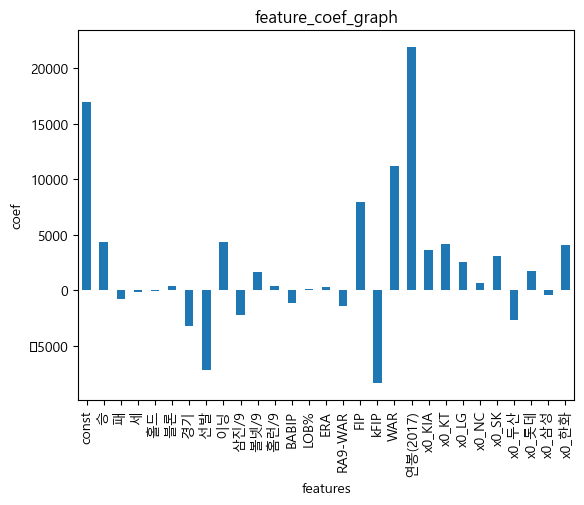

In [57]:
# 계수 시각화
# 회귀 계수를 시리즈로 변환
coefs = model.params.tolist()
coefs_se = pd.Series(coefs)

# 변수명을 리스트로 반환
x_labels = model.params.index.tolist()

ax = coefs_se.plot(kind = "bar")

ax.set_title("feature_coef_graph")
ax.set_xlabel("features")
ax.set_ylabel("coef")
ax.set_xticklabels(x_labels)

plt.show()

C:\ProgramData\anaconda3\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\ProgramData\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


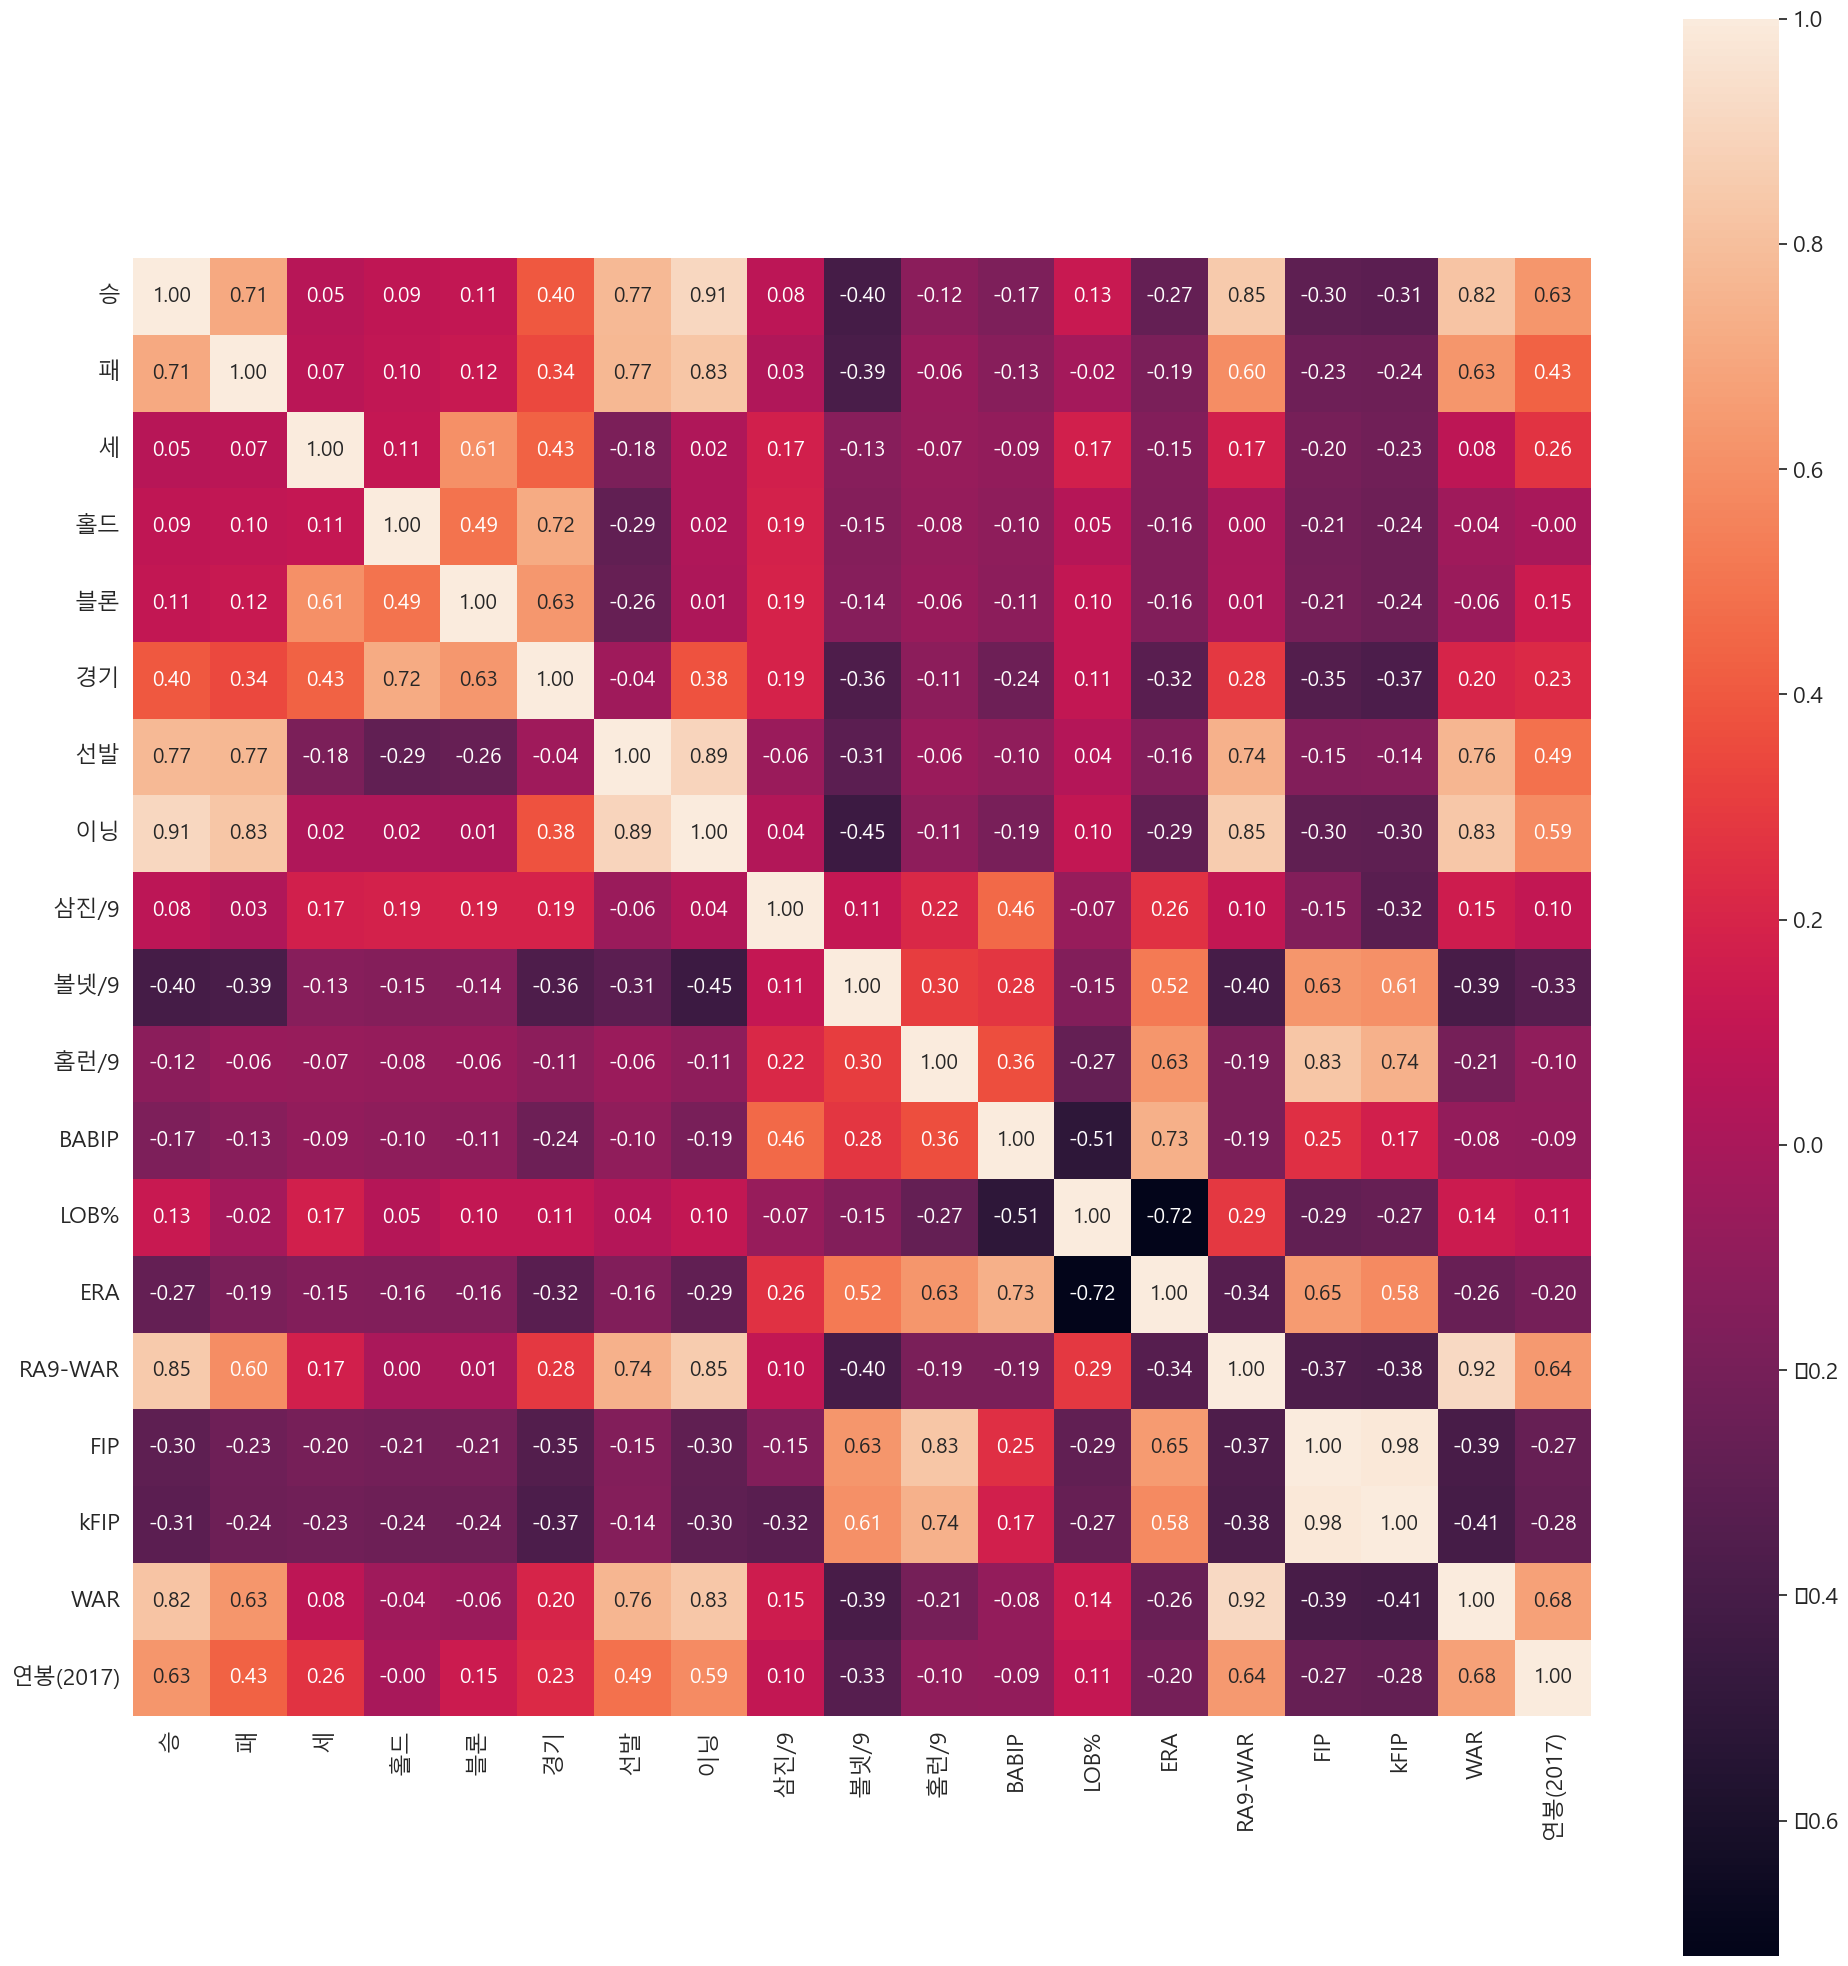

In [60]:
# 피처들의 상관관계 시각화
plt.figure(figsize = (20, 20))
corr = scaled_pich_df[scale_col].corr()
sns.set(font_scale = 1.5, font = "Malgun Gothic")
hm = sns.heatmap(corr.values, cbar = True, annot = True, square = True, fmt = ".2f",
                 annot_kws = {"size" : 15}, yticklabels = scale_col, xticklabels = scale_col)

plt.tight_layout()
plt.show()

- 몇몇 피처 쌍에서 높은 연관성을 발견할 수 있음
- 회귀 분석은 피처 간의 독립성을 전제로 하는 분석이기 때문에 올바른 회귀 분석을 위해서는 연관성이 높은 피처 쌍을 제거해야함
    - 다중공선성
        - 변수 간 상관 관계가 높아 분석에 부정적인 영향을 미치는 것
        - 모델 성능을 위해 어떤 피처를 제거하는 것이 옳은 판단일지에 대한 기준을 제시할 수 있음
        - 다중 공선성은 분산팽창요인(Variance Inflation Factor(VIF))이라는 계수로 평가
            - 일반적으로 VIF가 15를 넘으면 다중 공선성의 문제가 발생했다고 판단함

In [61]:
# 피처마다 VIF 계수를 출력
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["feature"] = X.columns
vif.round(1)

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF_Factor,feature
0,0.0,const
1,8.0,승
2,5.9,패
3,3.1,세
4,3.8,홀드
5,3.0,블론
6,14.6,경기
7,39.6,선발
8,63.8,이닝
9,89.5,삼진/9


### 변수제거 1

- 제거된 변수 : 홈런/9
- 무의미한 변수가 다중공선성보다 더 심각한 문제를 유발하기 때문
- 최종적으로는 p값이 높은 변수, VIF가 높은 변수 모두 제거되어야 함

In [62]:
new_X = X.drop("홈런/9", axis = 1)
new_X = sm.add_constant(new_X)
model = sm.OLS(y, new_X)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               연봉(2018)   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     61.02
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           9.14e-59
Time:                        16:36:45   Log-Likelihood:                -1588.0
No. Observations:                 152   AIC:                             3230.
Df Residuals:                     125   BIC:                             3312.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.694e+04    680.661     24.885      0.000    1.56e+04    1.83e+04
승           4321.1379   2101.909      2.056      0.042     161.198    8481.077
패           -767.7820   1780.865     -0.431      0.667   -4292.334    2756.770
세           -147.1224   1315.339     -0.112      0.911   -2750.341    2456.096
홀드           -90.6501   1445.370     -0.063      0.950   -2951.217    2769.917
블론           355.3677   1286.710      0.276      0.783   -2191.190    2901.926
경기         -3216.9453   2835.659     -1.134      0.259   -8829.066    2395.176
선발         -7212.7297   4686.591     -1.539      0.126   -1.65e+04    2062.615
이닝          4307.1114   5938.806      0.725      0.470   -7446.522    1.61e+04
삼진/9       -2376.9689   4173.000     -0.570      0.570   -1.06e+04    5881.917
볼넷/9        1488.0885   1414.539      1.052      0.295   -1311.460    4287.638
BABIP      -1170.3985   1329.518     -0.880      0.380   -3801.680    1460.883
LOB%          99.6068   1544.351      0.064      0.949   -2956.856    3156.069
ERA          296.3512   2430.778      0.122      0.903   -4514.461    5107.163
RA9-WAR    -1433.5852   2742.711     -0.523      0.602   -6861.750    3994.580
FIP         1.006e+04   2.13e+04      0.472      0.638   -3.21e+04    5.22e+04
kFIP       -1.012e+04   2.27e+04     -0.445      0.657   -5.51e+04    3.49e+04
WAR         1.118e+04   2398.557      4.661      0.000    6432.340    1.59e+04
연봉(2017)     2.19e+04   1173.528     18.662      0.000    1.96e+04    2.42e+04
x0_KIA      3637.1217   2354.263      1.545      0.125   -1022.257    8296.500
x0_KT       4176.7891   2147.119      1.945      0.054     -72.625    8426.203
x0_LG       2520.2440   2132.913      1.182      0.240   -1701.055    6741.544
x0_NC        695.2899   2562.861      0.271      0.787   -4376.931    5767.510
x0_SK       3145.7098   2126.389      1.479      0.142   -1062.678    7354.098
x0_두산      -2690.6491   2457.088     -1.095      0.276   -7553.531    2172.233
x0_롯데       1761.0273   2439.189      0.722      0.472   -3066.430    6588.484
x0_삼성       -426.3877   2199.205     -0.194      0.847   -4778.888    3926.112
x0_한화       4119.0775   2093.344      1.968      0.051     -23.911    8262.066
==============================================================================
Omnibus:                       42.767   Durbin-Watson:                   1.695
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              714.413
Skew:                           0.299   Prob(JB):                    7.36e-156
Kurtosis:                      13.604   Cond. No.                     2.93e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.17e-30. This might indicate

In [63]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(new_X.values, i) for i in range(new_X.shape[1])]
vif["feature"] = new_X.columns
vif.round(1)

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF_Factor,feature
0,0.0,const
1,8.0,승
2,5.7,패
3,3.1,세
4,3.8,홀드
5,3.0,블론
6,14.5,경기
7,39.5,선발
8,63.5,이닝
9,31.3,삼진/9


### 변수제거2

- 제거된 변수 : 홈런/9, 홀드

In [64]:
new_X = new_X.drop("홀드", axis = 1)
new_X = sm.add_constant(new_X)
model = sm.OLS(y, new_X)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               연봉(2018)   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     63.97
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           1.13e-59
Time:                        16:41:51   Log-Likelihood:                -1588.0
No. Observations:                 152   AIC:                             3228.
Df Residuals:                     126   BIC:                             3307.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.694e+04    677.818     24.988      0.000    1.56e+04    1.83e+04
승           4329.5381   2089.330      2.072      0.040     194.816    8464.261
패           -803.3305   1681.571     -0.478      0.634   -4131.111    2524.450
세           -102.9384   1106.371     -0.093      0.926   -2292.413    2086.536
블론           345.8847   1272.734      0.272      0.786   -2172.819    2864.588
경기         -3307.5269   2430.627     -1.361      0.176   -8117.666    1502.612
선발         -7208.8183   4667.616     -1.544      0.125   -1.64e+04    2028.257
이닝          4394.3886   5750.598      0.764      0.446   -6985.876    1.58e+04
삼진/9       -2394.3182   4147.331     -0.577      0.565   -1.06e+04    5813.128
볼넷/9        1488.9704   1408.868      1.057      0.293   -1299.137    4277.078
BABIP      -1171.4971   1324.138     -0.885      0.378   -3791.927    1448.933
LOB%          92.2873   1533.836      0.060      0.952   -2943.130    3127.704
ERA          286.3306   2415.916      0.119      0.906   -4494.695    5067.357
RA9-WAR    -1466.5424   2681.239     -0.547      0.585   -6772.635    3839.551
FIP         1.016e+04   2.12e+04      0.480      0.632   -3.17e+04    5.21e+04
kFIP       -1.022e+04   2.26e+04     -0.453      0.651   -5.49e+04    3.44e+04
WAR         1.117e+04   2384.979      4.684      0.000    6450.792    1.59e+04
연봉(2017)    2.189e+04   1164.742     18.798      0.000    1.96e+04    2.42e+04
x0_KIA      3630.0489   2342.247      1.550      0.124   -1005.189    8265.287
x0_KT       4192.8348   2123.379      1.975      0.050      -9.269    8394.939
x0_LG       2519.7273   2124.450      1.186      0.238   -1684.496    6723.951
x0_NC        688.1910   2550.220      0.270      0.788   -4358.620    5735.002
x0_SK       3135.1391   2111.304      1.485      0.140   -1043.069    7313.348
x0_두산      -2691.7941   2447.289     -1.100      0.273   -7534.907    2151.319
x0_롯데       1751.6360   2424.946      0.722      0.471   -3047.261    6550.533
x0_삼성       -412.5453   2179.436     -0.189      0.850   -4725.585    3900.495
x0_한화       4124.0938   2083.531      1.979      0.050       0.847    8247.341
==============================================================================
Omnibus:                       42.806   Durbin-Watson:                   1.693
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              712.694
Skew:                           0.304   Prob(JB):                    1.74e-155
Kurtosis:                      13.591   Cond. No.                     3.67e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.47e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is 

In [65]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(new_X.values, i) for i in range(new_X.shape[1])]
vif["feature"] = new_X.columns
vif.round(1)

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF_Factor,feature
0,0.0,const
1,7.9,승
2,5.1,패
3,2.2,세
4,2.9,블론
5,10.7,경기
6,39.5,선발
7,60.0,이닝
8,31.2,삼진/9
9,3.6,볼넷/9


### 변수제거3

- 제거된 변수 : 홈런/9, 홀드, LOB%

In [66]:
new_X = new_X.drop("LOB%", axis = 1)
new_X = sm.add_constant(new_X)
model = sm.OLS(y, new_X)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               연봉(2018)   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     67.16
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           1.36e-60
Time:                        16:44:47   Log-Likelihood:                -1588.0
No. Observations:                 152   AIC:                             3226.
Df Residuals:                     127   BIC:                             3302.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.694e+04    675.058     25.091      0.000    1.56e+04    1.83e+04
승           4328.3619   2081.027      2.080      0.040     210.386    8446.338
패           -801.3159   1674.630     -0.479      0.633   -4115.107    2512.475
세           -100.4483   1101.251     -0.091      0.927   -2279.625    2078.728
블론           349.9190   1265.971      0.276      0.783   -2155.210    2855.048
경기         -3330.0436   2392.205     -1.392      0.166   -8063.785    1403.698
선발         -7222.6903   4643.595     -1.555      0.122   -1.64e+04    1966.146
이닝          4385.4110   5726.067      0.766      0.445   -6945.442    1.57e+04
삼진/9       -2416.6676   4114.428     -0.587      0.558   -1.06e+04    5725.042
볼넷/9        1505.6476   1375.903      1.094      0.276   -1217.017    4228.312
BABIP      -1158.7940   1302.060     -0.890      0.375   -3735.335    1417.747
ERA          178.4213   1612.305      0.111      0.912   -3012.039    3368.882
RA9-WAR    -1409.8682   2500.470     -0.564      0.574   -6357.848    3538.111
FIP         1.044e+04   2.06e+04      0.507      0.613   -3.03e+04    5.11e+04
kFIP       -1.048e+04   2.21e+04     -0.475      0.636   -5.42e+04    3.32e+04
WAR         1.114e+04   2329.167      4.784      0.000    6533.361    1.58e+04
연봉(2017)    2.189e+04   1159.196     18.885      0.000    1.96e+04    2.42e+04
x0_KIA      3617.5835   2323.896      1.557      0.122    -980.988    8216.155
x0_KT       4187.2260   2112.994      1.982      0.050       5.993    8368.459
x0_LG       2517.1691   2115.676      1.190      0.236   -1669.372    6703.710
x0_NC        690.4651   2539.918      0.272      0.786   -4335.574    5716.504
x0_SK       3122.8441   2093.132      1.492      0.138   -1019.087    7264.775
x0_두산      -2663.9310   2393.630     -1.113      0.268   -7400.493    2072.631
x0_롯데       1761.7600   2409.593      0.731      0.466   -3006.390    6529.910
x0_삼성       -421.1827   2166.155     -0.194      0.846   -4707.613    3865.248
x0_한화       4126.0853   2075.080      1.988      0.049      19.876    8232.294
==============================================================================
Omnibus:                       42.829   Durbin-Watson:                   1.692
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              711.543
Skew:                           0.306   Prob(JB):                    3.09e-155
Kurtosis:                      13.582   Cond. No.                     3.04e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.07e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [67]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(new_X.values, i) for i in range(new_X.shape[1])]
vif["feature"] = new_X.columns
vif.round(1)

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF_Factor,feature
0,0.0,const
1,7.9,승
2,5.1,패
3,2.2,세
4,2.9,블론
5,10.5,경기
6,39.4,선발
7,59.9,이닝
8,31.0,삼진/9
9,3.5,볼넷/9


# 분석결과

In [68]:
fin_x = scaled_pich_df[["승", "경기", "선발", "WAR", "연봉(2017)"]]

In [70]:
x_train, x_test, y_train, y_test = train_test_split(fin_x, y, test_size = 0.25, random_state = 0)

In [71]:
fin_lr = LinearRegression()
fin_lr.fit(x_train, y_train)

LinearRegression()

In [72]:
fin_lr.score(x_test, y_test)

0.8443918690956278

In [73]:
fin_pred = fin_lr.predict(x_test)
fin_mae = mean_absolute_error(y_test, fin_pred)
fin_mae

5265.077407643437

# 최종 시각화

In [74]:
result_df = scaled_pich_df[["승", "경기", "선발", "WAR", "연봉(2017)"]]
vis_pred = fin_lr.predict(result_df)

In [75]:
vis_df = pd.read_csv("./data/picher_stats_2017.csv")

In [76]:
vis_df["예측연봉"] = vis_pred

In [77]:
vis_df.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017),예측연봉
0,켈리,SK,16,7,0,0,0,30,30,190.0,8.95,2.13,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000,133360.463490
1,소사,LG,11,11,1,0,0,30,29,185.1,7.43,1.85,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000,90780.098760
2,양현종,KIA,20,6,0,0,0,31,31,193.1,7.36,2.09,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000,187145.421405
3,차우찬,LG,10,7,0,0,0,28,28,175.2,8.04,1.95,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000,120864.276092
4,레일리,롯데,13,7,0,0,0,30,30,187.1,7.49,2.11,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000,109589.333507


In [78]:
# 재계약을 하여 연봉이 변화한 선수만 대상으로 시각화
# 재계약을 하지 않는다면 연봉에 변화가 없어 예측이 의미가 없기 때문
vis_df = vis_df[vis_df["연봉(2018)"] != vis_df["연봉(2017)"]]
vis_df.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017),예측연봉
0,켈리,SK,16,7,0,0,0,30,30,190.0,8.95,2.13,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000,133360.463490
1,소사,LG,11,11,1,0,0,30,29,185.1,7.43,1.85,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000,90780.098760
2,양현종,KIA,20,6,0,0,0,31,31,193.1,7.36,2.09,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000,187145.421405
4,레일리,롯데,13,7,0,0,0,30,30,187.1,7.49,2.11,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000,109589.333507
5,피어밴드,KT,8,10,0,0,0,26,26,160.0,7.42,1.74,1.12,0.289,76.1,3.04,6.52,4.42,4.32,3.94,85000,35000,57661.566940


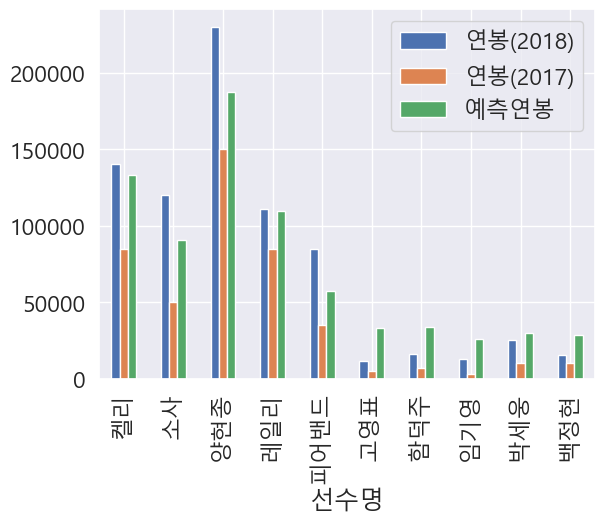

In [79]:
vis_df.head(10).plot(x = "선수명", y = ["연봉(2018)", "연봉(2017)", "예측연봉"], kind = "bar")
plt.show()